## Problem : To derive all possible insights (min 5) from the two years transaction details dataset.

In [1]:
from itertools import combinations
from collections import Counter
import pandas as pd
import datetime as dt
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("C:/Users/rhari/OneDrive/Documents/DecathlonCaseStudy/customer_transactions_sample.xlsx")

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.shape

(525461, 8)

In [5]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [6]:
df['Month'] = df['InvoiceDate'].dt.month

### First lets separate the cancelled and completed transactions

### since there are NaN values we will first handle them

## 1. Data Cleaning

In [7]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head(100)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom,12
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom,12
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom,12
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom,12
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom,12
...,...,...,...,...,...,...,...,...,...
1911,489597,20863,BLUE PATCH PENCIL CASE PINK HEART,1,2009-12-01 14:28:00,4.30,NaN,United Kingdom,12
1912,489597,20865,PATCHWORK PENCIL CASE BUTTERFLY,2,2009-12-01 14:28:00,4.30,NaN,United Kingdom,12
1913,489597,20866,BLUE ROSE FABRIC MIRROR,2,2009-12-01 14:28:00,2.57,NaN,United Kingdom,12
1914,489597,20886,BOX OF 9 PEBBLE CANDLES,1,2009-12-01 14:28:00,4.30,NaN,United Kingdom,12


In [8]:
print(df.columns[df.isnull().any()])


Index(['Description', 'Customer ID'], dtype='object')


#### Notes:
    1. There are rows which have the price as 0, quantity bought as -ve.
    2. NaN values are present in Description and CustomerId
    3. First we will drop collumns with NaN values, since NaN value in a nominal field like customerId and product description means that particular row doesn't provide any insight in to who made the transaction or on what it was made then we will eliminate all rows with zero price and negative quantity. 

In [9]:
nan_description_rows = df[df['Description'].isnull()]
if nan_description_rows['StockCode'].nunique() == 1:
    print("All rows with NaN in Description have the same StockCode.")
    print("StockCode:", nan_description_rows['StockCode'].iloc[0])
else:
    print("Rows with NaN in Description have different StockCodes.")


Rows with NaN in Description have different StockCodes.


In [10]:
#Get unique StockCodes for rows with null Description
nan_description_stock_codes = nan_description_rows['StockCode'].unique()
print("Stock Codes with null Description:")
len(nan_description_stock_codes)

Stock Codes with null Description:


1920

In [11]:
# Group the DataFrame by 'StockCode' and check if any group has both NaN and non-NaN values in 'Description'
has_both_nan_and_non_nan = df.groupby('StockCode')['Description'].apply(lambda x: x.isnull().any() and not x.isnull().all())

# Filter to get StockCodes with NaN in one row but a value in Description in other rows
stock_codes_with_mixed_description = has_both_nan_and_non_nan[has_both_nan_and_non_nan].index.tolist()

# Print StockCodes with mixed description
if stock_codes_with_mixed_description:
    print("StockCodes with NaN in one row and a value in Description in other rows:")
    print(stock_codes_with_mixed_description)
else:
    print("There are no StockCodes with NaN in one row but a value in Description in other rows.")


StockCodes with NaN in one row and a value in Description in other rows:
[10080, 10109, 10134, 10138, 15036, 16015, 16033, 16043, 16044, 16047, 16049, 16050, 16051, 16052, 16053, 16119, 16192, 16212, 16215, 16239, 16254, 17001, 17021, 17033, 17038, 17039, 17061, 17178, 17181, 18010, 20617, 20618, 20620, 20621, 20652, 20653, 20657, 20659, 20660, 20663, 20666, 20668, 20669, 20670, 20671, 20672, 20673, 20679, 20680, 20683, 20684, 20685, 20688, 20689, 20692, 20693, 20695, 20698, 20703, 20713, 20714, 20715, 20721, 20728, 20729, 20730, 20731, 20734, 20736, 20737, 20747, 20748, 20753, 20756, 20757, 20758, 20759, 20760, 20773, 20774, 20775, 20776, 20777, 20778, 20783, 20784, 20785, 20786, 20787, 20791, 20793, 20799, 20800, 20804, 20812, 20814, 20818, 20821, 20822, 20825, 20827, 20832, 20833, 20845, 20848, 20849, 20851, 20855, 20856, 20857, 20858, 20860, 20861, 20862, 20863, 20864, 20865, 20870, 20871, 20877, 20878, 20879, 20881, 20882, 20884, 20885, 20887, 20888, 20889, 20890, 20891, 20892, 20

In [12]:
len(df['Customer ID'].unique())

4384

In [13]:
df = df.dropna(subset=['Customer ID'])

In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12


In [15]:
df.rename(columns={'Customer ID':'CustomerID'}, inplace=True)

In [16]:
# droping rows with price 0 and quantity negative
df = df[df['Price'] != 0]

In [17]:
df = df[df['Quantity'] >= 0]

In [18]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12


In [19]:
# updating nanDf
nan_df = df[df.isna().any(axis=1)]
len(nan_df)

0

#### Note: All NaN values are cleaned from the dataset

#### Now, we will proceed to separate cancelled and completed transactions from the dataset

In [20]:
df['Invoice'] = df['Invoice'].astype(str)

In [21]:
cancelled_transactions = df[df['Invoice'].str.startswith('c')]
cancelled_transactions.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month


### Note: There are 0 cancelled transactions in the dataset

In [22]:
df.shape

(407664, 9)

In [23]:
### checking for outliers in two numerical collumns price and qty
summary_stats = df[['Quantity', 'Price']].describe()
print(summary_stats)

            Quantity          Price
count  407664.000000  407664.000000
mean       13.585585       3.294438
std        96.840747      34.757965
min         1.000000       0.001000
25%         2.000000       1.250000
50%         5.000000       1.950000
75%        12.000000       3.750000
max     19152.000000   10953.500000


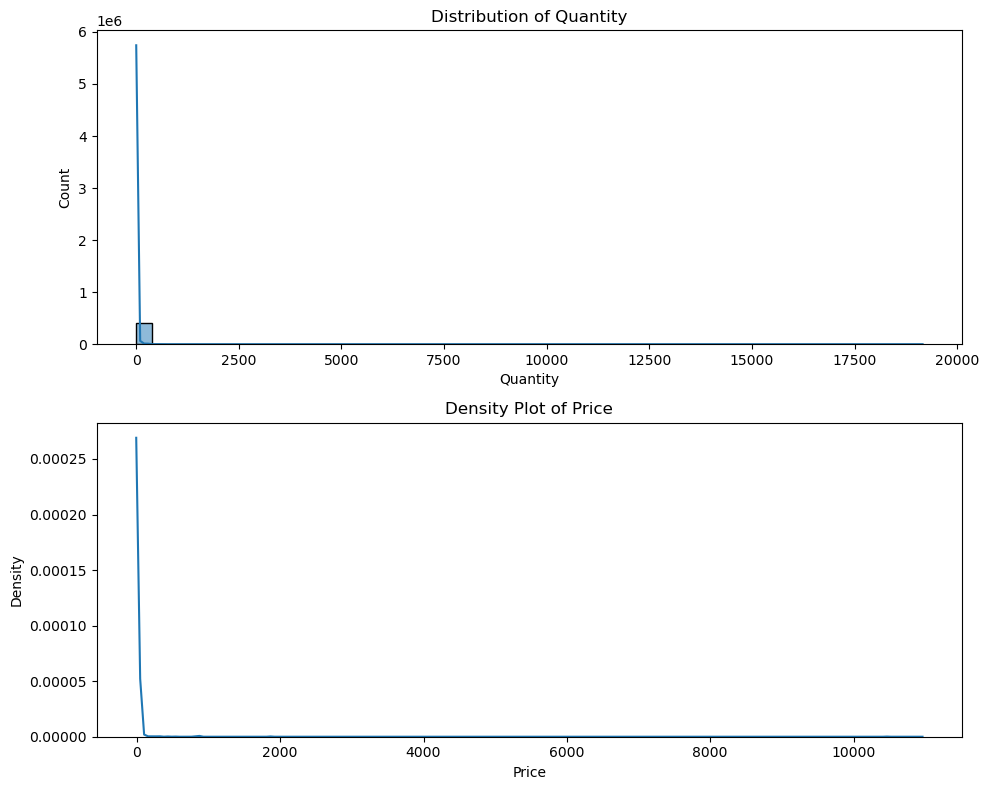

In [102]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sns.histplot(data=df, x='Quantity', bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Quantity')
sns.kdeplot(data=df, x='Price', ax=axes[1])
axes[1].set_title('Density Plot of Price')
plt.tight_layout()
plt.savefig('dist_qty_price.jpg')
plt.show()

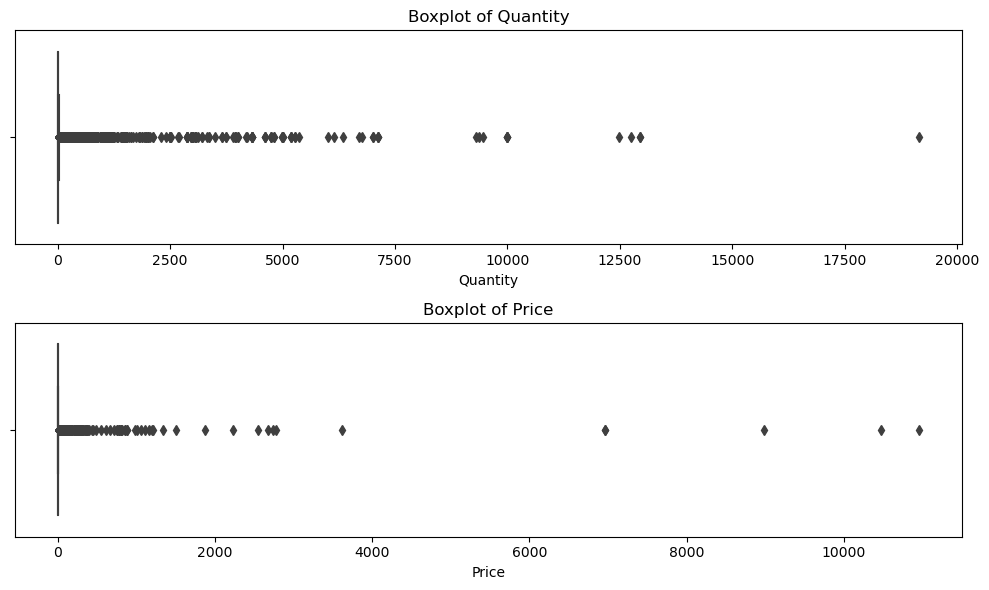

In [104]:
#Visualize using box plot
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')

plt.subplot(2, 1, 2)
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price')

plt.tight_layout()
plt.savefig('box_price_qty.jpg')
plt.show()


### Note: Box Plot shows presence of outliers in the data. However, these outliers maybe caused by a clearance sale, bulk order, luxury items etc. Since, on visual inspection of the plot we dont see any negative values we will consider all values

### However, we will check the rows that are falling with a z-score > 3 and check for the data sanity in those rows 

In [27]:
z_scores_quantity = (df['Quantity'] - df['Quantity'].mean()) / df['Quantity'].std()
z_scores_unit_price = (df['Price'] - df['Price'].mean()) / df['Price'].std()

outliers_quantity = df[abs(z_scores_quantity) > 3]
outliers_unit_price = df[abs(z_scores_unit_price) > 3]

outliers_unit_price.head(100)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA,12
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium,12
21450,491094,POST,POSTAGE,1,2009-12-09 13:49:00,216.00,12709.0,Germany,12
22960,491176,M,Manual,1,2009-12-10 11:50:00,1213.02,13091.0,United Kingdom,12
38943,492650,M,Manual,1,2009-12-17 17:43:00,803.25,14911.0,EIRE,12
...,...,...,...,...,...,...,...,...,...
292665,517930,22656,VINTAGE BLUE KITCHEN CABINET,1,2010-08-03 10:38:00,295.00,15727.0,United Kingdom,8
292666,517930,22655,VINTAGE RED KITCHEN CABINET,1,2010-08-03 10:38:00,295.00,15727.0,United Kingdom,8
292749,517934,M,Manual,1,2010-08-03 10:52:00,800.00,12748.0,United Kingdom,8
294240,518052,POST,POSTAGE,1,2010-08-04 11:38:00,334.88,12748.0,United Kingdom,8


### As we can see that for such values in the df that falls within z-score>3 either the qty purchased is high or the price is really high. This could owe to the product being an expensive luxury product or a bulk order etc.

## 2. EDA

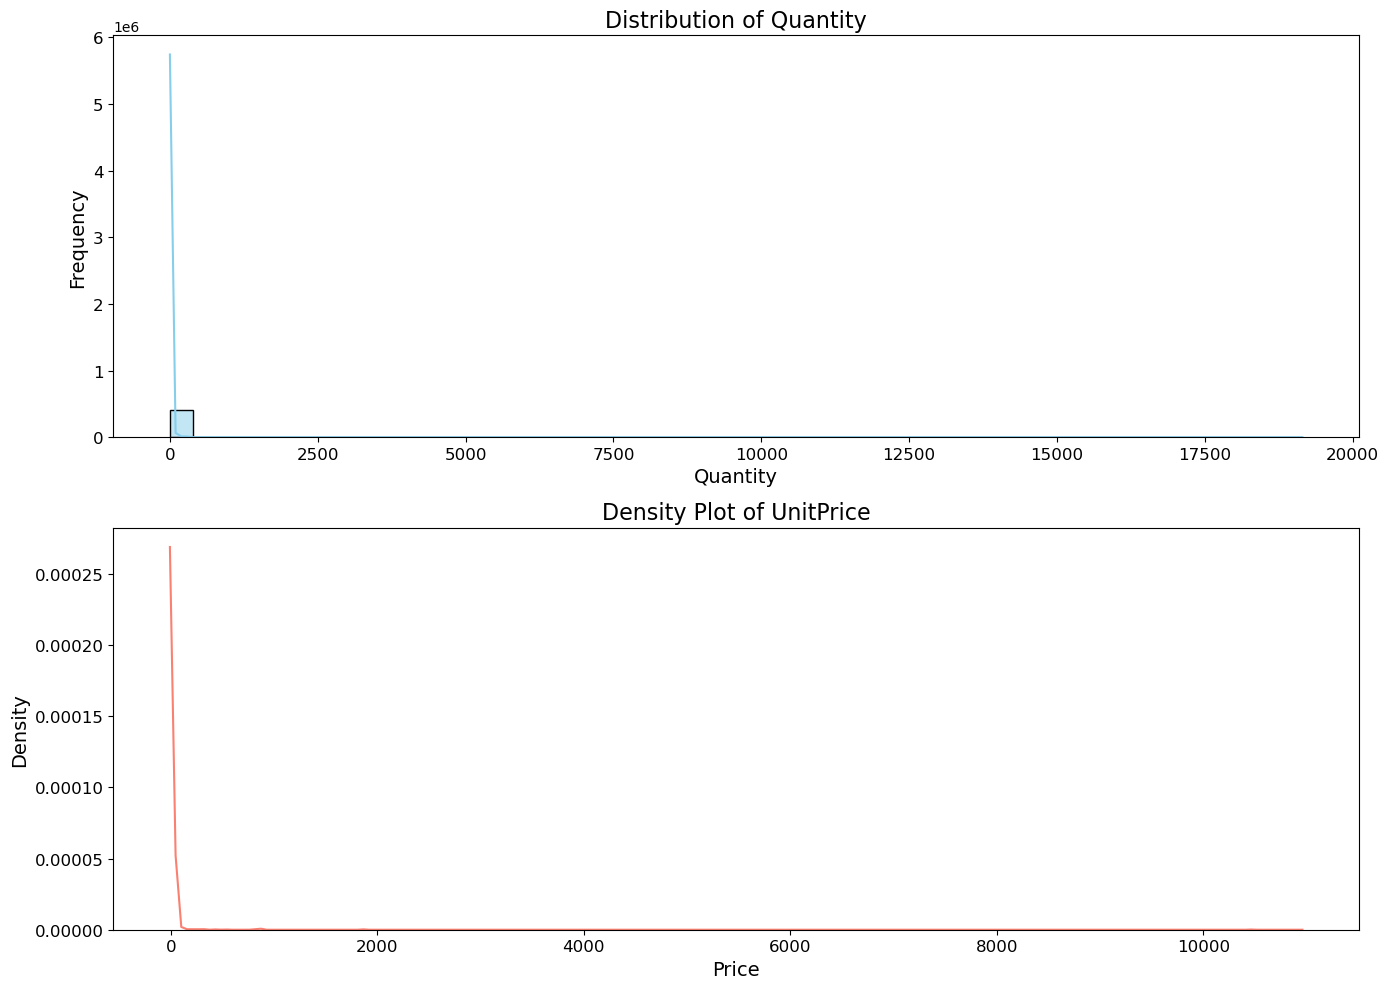

Descriptive Statistics for Quantity:
count    407664.000000
mean         13.585585
std          96.840747
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       19152.000000
Name: Quantity, dtype: float64

Descriptive Statistics for Price:
count    407664.000000
mean          3.294438
std          34.757965
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: Price, dtype: float64


In [106]:

plt.figure(figsize=(14, 10))

# Plot histogram of Quantity
plt.subplot(2, 1, 1)
sns.histplot(data=df, x='Quantity', bins=50, kde=True, color='skyblue')
plt.title('Distribution of Quantity', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot density plot of Price
plt.subplot(2, 1, 2)
sns.kdeplot(data=df, x='Price', color='salmon')
plt.title('Density Plot of UnitPrice', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout
plt.savefig('box_price_qty.jpg')
plt.tight_layout()
plt.show()

# Descriptive statistics for Quantity and UnitPrice
print("Descriptive Statistics for Quantity:")
print(df['Quantity'].describe())

print("\nDescriptive Statistics for Price:")
print(df['Price'].describe())


#### Notes:
1. The distribution of 'Quantity' confirms the right-skewed nature observed in the histogram. The mean (13.59) is higher than the median (5), indicating a skew towards higher values.
2. The standard deviation (96.84) is relatively large compared to the mean, indicating a wide range of variation in the quantity of products purchased.
3. The distribution of 'Price' also confirms the right-skewed pattern observed in the density plot. The mean (3.29) is higher than the median (1.95), indicating a skew towards higher prices
4. The standard deviation (34.76) is relatively large compared to the mean, indicating a wide range of variation in prices.
5. The negative correlation between 'Quantity' and 'Price' is evident, as higher quantities tend to have lower unit prices and vice versa.
6. The pattern is consisten with typical retial pricing strategy. 

### Adding month day and year collumns from invoice date

In [29]:
df['DayOfWeek']=df['InvoiceDate'].dt.dayofweek
# 0 -6 means monday to sunday respectively

In [30]:
df['year']=df['InvoiceDate'].dt.year

In [31]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month,DayOfWeek,year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12,1,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,1,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,1,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12,1,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12,1,2009


In [32]:
df["Revenue"]=df['Quantity'] * df['Price']

In [33]:
df.rename(columns={'Revenue':'Sales', 'year':'Year'}, inplace=True)

In [34]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month,DayOfWeek,Year,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12,1,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,1,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,1,2009,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12,1,2009,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12,1,2009,30.0


### Analysing sales with respect to day, month and year. 

In [35]:
df['Month']=df['Month'].astype('int32')
df['Quantity']=df['Quantity'].astype('int32')

In [36]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int32
InvoiceDate    datetime64[ns]
Price                 float64
CustomerID            float64
Country                object
Month                   int32
DayOfWeek               int32
Year                    int32
Sales                 float64
dtype: object

In [37]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month,DayOfWeek,Year,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12,1,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,1,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,1,2009,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12,1,2009,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12,1,2009,30.0


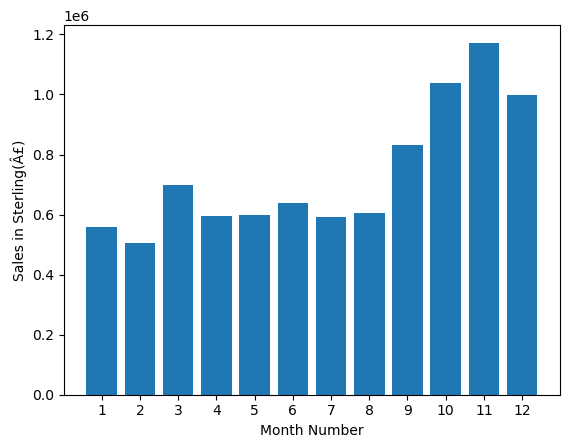

In [100]:
sales_wrt_month = df.groupby('Month')['Sales'].sum()
months = range(1,13)

plt.bar(months, sales_wrt_month)
plt.xticks(months)
plt.ylabel("Sales in Sterling(Â£)")
plt.xlabel("Month Number")
plt.savefig('totSalesWrtMonth.jpg')
plt.show()

In [39]:
sales_wrt_month

Month
1      557319.062
2      506371.066
3      699608.991
4      594609.192
5      599985.790
6      639066.580
7      591636.740
8      604242.650
9      831615.001
10    1036680.000
11    1172336.042
12     998532.160
Name: Sales, dtype: float64

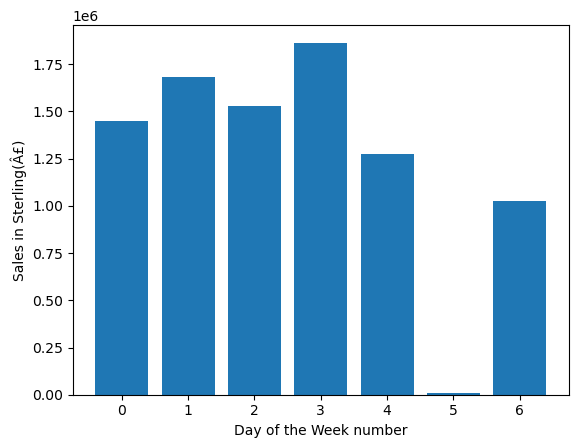

In [101]:
sales_wrt_dow = df.groupby('DayOfWeek')['Sales'].sum()
day = range(0,7)

plt.bar(day, sales_wrt_dow)
plt.xticks(day)
plt.ylabel("Sales in Sterling(Â£)")
plt.xlabel("Day of the Week number")
plt.savefig('totsalesWrtDoW.jpg')
plt.show()

In [41]:
sales_wrt_dow

DayOfWeek
0    1450261.395
1    1684044.201
2    1527283.523
3    1864223.892
4    1272488.092
5       9803.050
6    1023899.121
Name: Sales, dtype: float64

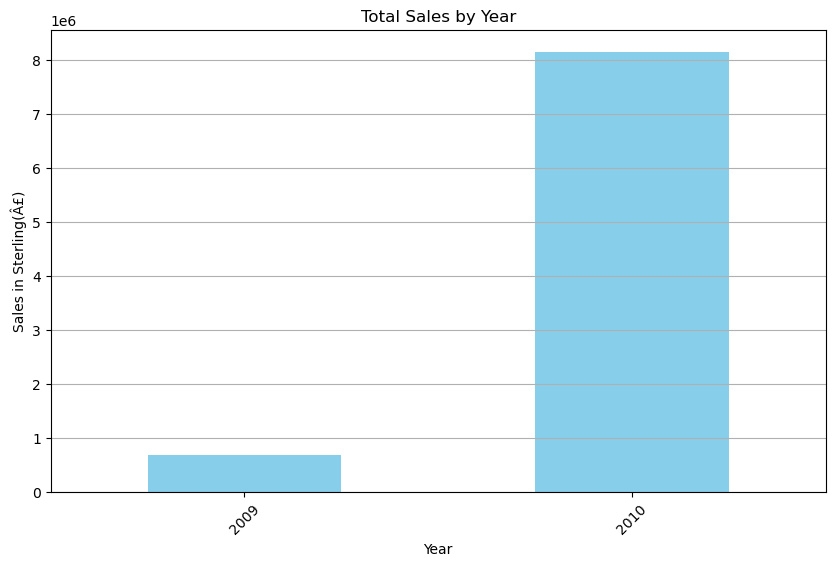

In [98]:
sales_wrt_year = df.groupby('Year')['Sales'].sum()

plt.figure(figsize=(10, 6))
sales_wrt_year.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales in Sterling(Â£)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('totsalesWYear.jpg')
plt.show()



In [43]:
sales_percent = ((sales_wrt_year.iloc[1]-sales_wrt_year.iloc[0])/sales_wrt_year.iloc[0])*100
print("Sales has increase by approximately {} percent".format(round(sales_percent)))

Sales has increase by approximately 1086 percent


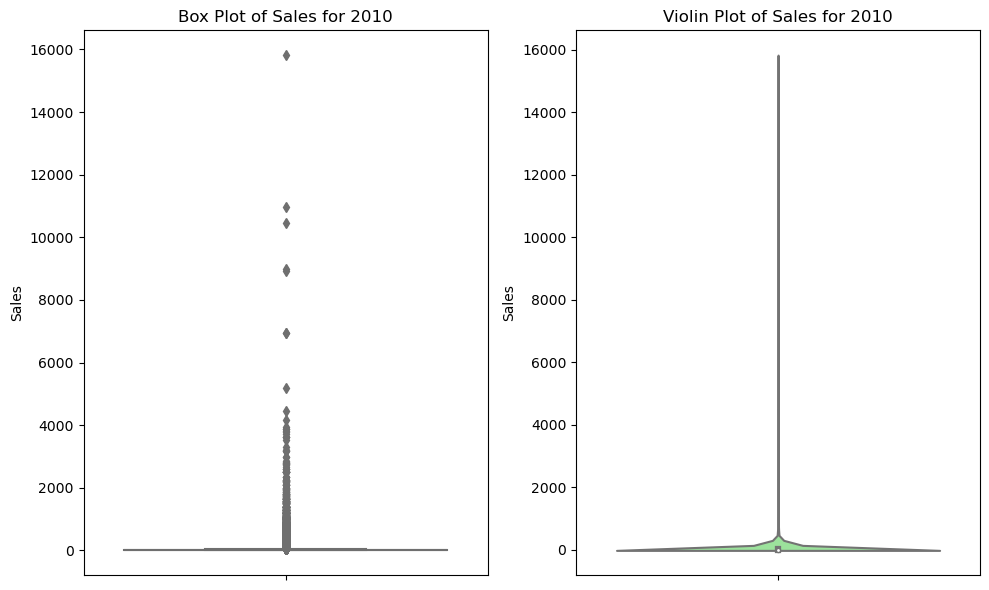

In [97]:
### A 10000% increase in sales over one year is unusual hence checking for outliers for 2010 year

# Filter sales data for the year 2010
sales_2010 = df[df['Year'] == 2010]['Sales']

# Create a figure with subplots
plt.figure(figsize=(10, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(y=sales_2010, color='skyblue')
plt.title('Box Plot of Sales for 2010')

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(y=sales_2010, color='lightgreen')
plt.title('Violin Plot of Sales for 2010')

# Adjust layout
plt.tight_layout()
plt.savefig('box_ViolinPlot2010.jpg')
plt.show()



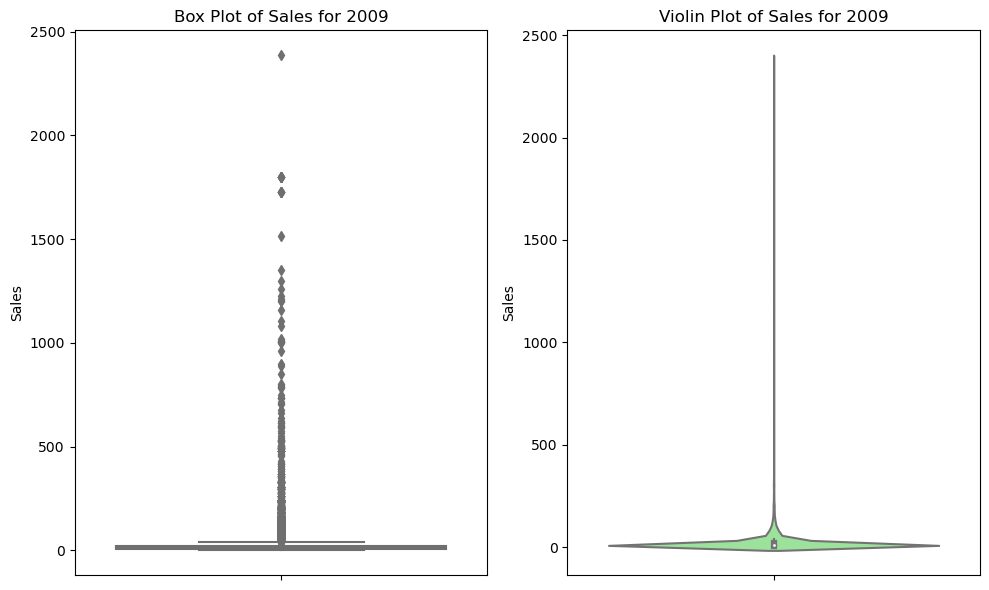

In [96]:
# Filter sales data for the year 2009
sales_2009 = df[df['Year'] == 2009]['Sales']

# Create a figure with subplots
plt.figure(figsize=(10, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(y=sales_2009, color='skyblue')
plt.title('Box Plot of Sales for 2009')

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(y=sales_2009, color='lightgreen')
plt.title('Violin Plot of Sales for 2009')

# Adjust layout
plt.tight_layout()
plt.savefig('box_ViolinPlot2009.jpg')
plt.show()


## Observations: 
1. The highest number of sales was done in the months of October, Novermber and December with the highest at  November with 1.17 Million GBP and the lowest in February at around 506K GBP. This could be owed due to the holiday season, where people are more likely to spend money.
2. The highest sales happend on Thursdays and on Saturdays it is the lowest at 9.8K GBP.
3. The sales has shown tremendous increase in sales from 2009 to 2010, over ~1000%.
4. As we know, the dataset is extremel;y right skewed, meaning a significant number of transactions are way above the median. We are assuming this is casued due to either bulk number of purchase of items or purchase of luxury items

### Number of transactions wrt to country

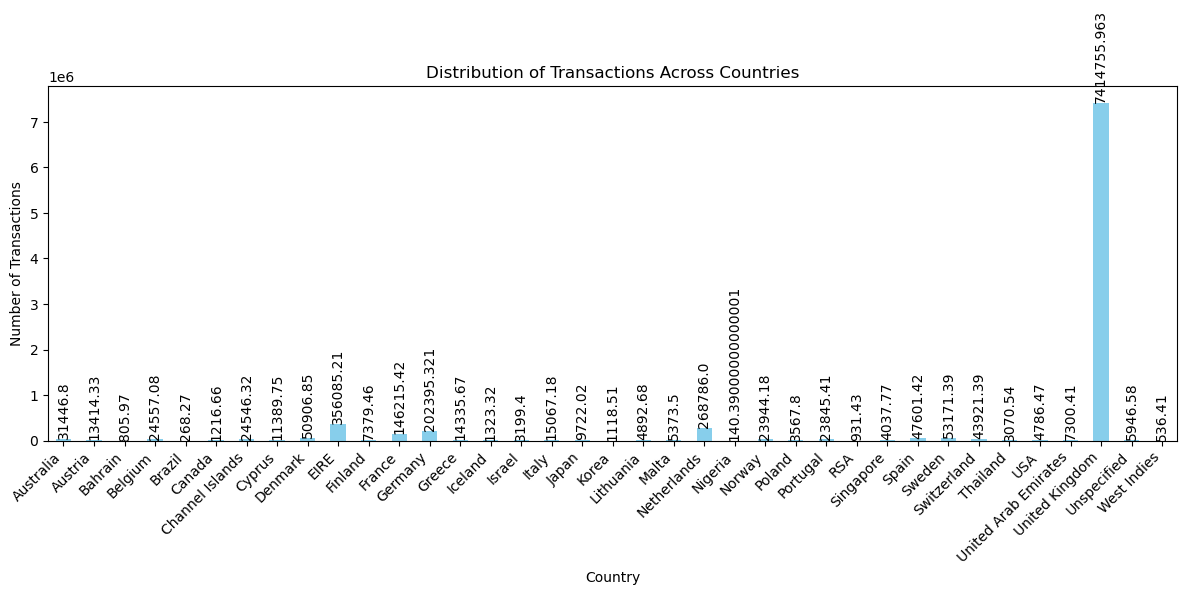

In [95]:
transactions_by_country = df.groupby('Country')['Sales'].sum()
plt.figure(figsize=(12, 6))
bar_plot = transactions_by_country.plot(kind='bar', color='skyblue')
plt.title('Distribution of Transactions Across Countries')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')

for idx, count in enumerate(transactions_by_country):
    bar_plot.text(idx, count + 10, str(count), ha='center', va='bottom', rotation='vertical')

plt.tight_layout()
plt.savefig('distTransactionWrtCountry.jpg')
plt.show()

In [47]:
transactions_by_country

Country
Australia                 31446.800
Austria                   13414.330
Bahrain                     805.970
Belgium                   24557.080
Brazil                      268.270
Canada                     1216.660
Channel Islands           24546.320
Cyprus                    11389.750
Denmark                   50906.850
EIRE                     356085.210
Finland                    7379.460
France                   146215.420
Germany                  202395.321
Greece                    14335.670
Iceland                    1323.320
Israel                     3199.400
Italy                     15067.180
Japan                      9722.020
Korea                      1118.510
Lithuania                  4892.680
Malta                      5373.500
Netherlands              268786.000
Nigeria                     140.390
Norway                    23944.180
Poland                     3567.800
Portugal                  23845.410
RSA                         931.430
Singapore           

### Sales wrt hour of the day

In [48]:
df['Hour'] = df['InvoiceDate'].dt.hour

In [49]:
df.groupby(['Hour']).count()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month,DayOfWeek,Year,Sales
Hour,,,,,,,,,,,,
7,684,684,684,684,684,684,684,684,684,684,684,684
8,6645,6645,6645,6645,6645,6645,6645,6645,6645,6645,6645,6645
9,19617,19617,19617,19617,19617,19617,19617,19617,19617,19617,19617,19617
10,36070,36070,36070,36070,36070,36070,36070,36070,36070,36070,36070,36070
11,51035,51035,51035,51035,51035,51035,51035,51035,51035,51035,51035,51035
12,72433,72433,72433,72433,72433,72433,72433,72433,72433,72433,72433,72433
13,67548,67548,67548,67548,67548,67548,67548,67548,67548,67548,67548,67548
14,56228,56228,56228,56228,56228,56228,56228,56228,56228,56228,56228,56228
15,43895,43895,43895,43895,43895,43895,43895,43895,43895,43895,43895,43895


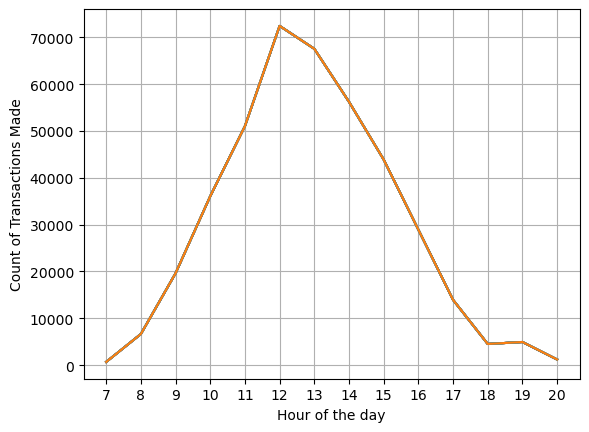

In [94]:
hours = [hour for hour, df in df.groupby('Hour')]

plt.plot(hours, df.groupby('Hour').count())
plt.grid()
plt.xticks(hours)
plt.xlabel("Hour of the day")
plt.ylabel("Count of Transactions Made")
plt.savefig('transCountWrtHroD.jpg')
plt.show()

## Observations: 

1. We can see that the maximum number of transactions have occured between 11:00Am and around 02:30PM peaking at 12:00PM.
2. The rate of change in number of transactions showed an increase at 08:00AM and 11:00AM and peaked at 12:00PM.
3. The rate of change in number of transactions in a day shows steady decrease past 01:00PM.
4. In the window of 06:00PM and 07:00PM the number of transactions are pretty much steady and then goes on to decrease.
        
This information can be key when plannig marketing activities like product advertisements etc.

In [53]:
sales_country.sort_values(ascending=False)

Country
United Kingdom          7414755.963
EIRE                     356085.210
Netherlands              268786.000
Germany                  202395.321
France                   146215.420
Sweden                    53171.390
Denmark                   50906.850
Spain                     47601.420
Switzerland               43921.390
Australia                 31446.800
Belgium                   24557.080
Channel Islands           24546.320
Norway                    23944.180
Portugal                  23845.410
Italy                     15067.180
Greece                    14335.670
Austria                   13414.330
Cyprus                    11389.750
Japan                      9722.020
Finland                    7379.460
United Arab Emirates       7300.410
Unspecified                5946.580
Malta                      5373.500
Lithuania                  4892.680
USA                        4786.470
Singapore                  4037.770
Poland                     3567.800
Israel              

## Observations: 
### Here also we can observe that the highest number of transaction has happened in the UK over 370K transactions generating over 7.4M GBP.

The next highest number of transactions happened in Ireland, Germany, France & Netherlands. However, the order in sales generated in these countries is different. The no of transaction to Sales generated for the top 4 countries after the UK are as below

| Country | No of transaction |
|----------|---------------|
| Ireland | 8.5 |
| Germany | 7.6 |
| France | 5.4 |
| Netherlands | 2.7 |

| Country | Sales generated in GBP |
|----------|---------------|
| Ireland | 356K |
| Netherlands | 268K |
| Germany | 202K |
| France | 146K |


This indicates that Ireland has potential customers on the products the company is selling. More marketing resources should be focussed on Ireland if expansion is a priority of the company.

Also, Netherlands had the lowest number of transaction amongst the rest yet they generated the highest sales after UK and Ireland. Meaning, there are high spenders in this region, hence diverting resources for marketing of high value/ luxury products in this region could increase the sales in this region. 

### Analyzing the top products sold

In [54]:
len(df['StockCode'].unique())

4017

In [55]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month,DayOfWeek,Year,Sales,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12,1,2009,83.4,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,1,2009,81.0,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,1,2009,81.0,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12,1,2009,100.8,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12,1,2009,30.0,7


In [56]:
test= df.groupby('Description')['Quantity'].sum()

In [57]:
top= test.sort_values(ascending=False)
top.head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    56915
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54754
BROCADE RING PURSE                    48166
PACK OF 72 RETRO SPOT CAKE CASES      45156
ASSORTED COLOUR BIRD ORNAMENT         44551
Name: Quantity, dtype: int32

### The top sold item is WHITE HANGING HEART T-LIGHT HOLDER and 56915 units were sold over the two years. 

| Item | Units sold |
|----------|---------------|
| WHITE HANGING HEART T-LIGHT HOLDER | 56915 |
| WORLD WAR 2 GLIDERS ASSTD DESIGN | 54754 |
| BROCADE RING PURSE | 48166 |
| PACK OF 72 RETRO SPOT CAKE CASES | 45156 |
| ASSORTED COLOUR BIRD ORNAMENT | 44551 |

In [58]:
tot_revenue = df['Sales'].sum()
print("Total Revenue generated over 2 years: {}".format(round(tot_revenue,2)))

Total Revenue generated over 2 years: 8832003.27


## Total Revenue generated over the past 2 years = 8.83Mi GBP

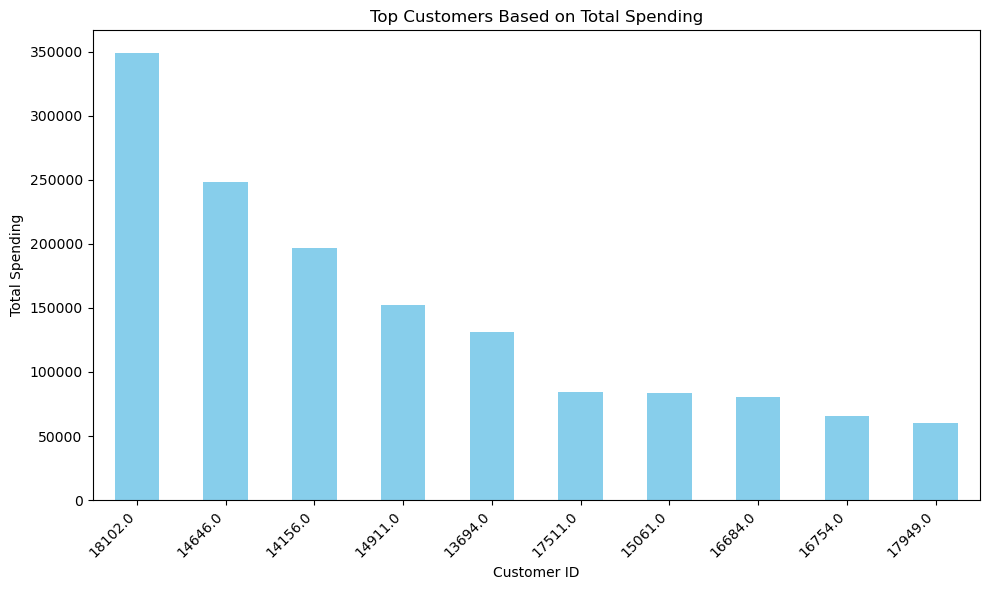

In [92]:
tot_spending_customer = df.groupby('CustomerID')['Sales'].sum()
tot_spending_customer = tot_spending_customer.sort_values(ascending = False)
tot_spending_customer.head(5)

plt.figure(figsize=(10, 6))
bar_plot = tot_spending_customer.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Customers Based on Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('topCustOnSpending.jpg')
plt.show()


## Observations : 

1. The top spending 5 customers are 
|Customer ID| Sales generated in GBP|
|----------|--------|
|18102.0|    349164.35|
|14646.0|    248396.50|
|14156.0|    196566.74|
|14911.0|    152147.57|
|13694.0|    131443.19|

This gives bussiness the insight into who are their top spenders, helping them in understanding who is their most valuable customers.

In [60]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month,DayOfWeek,Year,Sales,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12,1,2009,83.4,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,1,2009,81.0,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,1,2009,81.0,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12,1,2009,100.8,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12,1,2009,30.0,7


In [61]:
df.describe()

,Quantity,InvoiceDate,Price,CustomerID,Month,DayOfWeek,Year,Sales,Hour
count,407664.000000,407664,407664.000000,407664.000000,407664.000000,407664.000000,407664.00000,407664.000000,407664.000000
mean,13.585585,2010-07-01 10:15:11.871688192,3.294438,15368.592598,7.404600,2.689666,2009.92456,21.664909,12.873962
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,1.000000,0.000000,2009.00000,0.001000,7.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,13997.000000,4.000000,1.000000,2010.00000,4.950000,11.000000
50%,5.000000,2010-07-09 15:47:00,1.950000,15321.000000,8.000000,3.000000,2010.00000,11.900000,13.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16812.000000,11.000000,4.000000,2010.00000,19.500000,14.000000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000,12.000000,6.000000,2010.00000,15818.400000,20.000000
std,96.840747,NaN,34.757965,1679.762138,3.472715,1.978086,0.26410,77.150058,2.303916


### Products sold together

In [62]:
# extract the duplicates into a df

df_dup = df[df['Invoice'].duplicated(keep = False)]
df_dup['GroupedProducts'] = df_dup.groupby('Invoice')['Description'].transform(lambda x : ','.join(x))

df_dup=df_dup[['Invoice', 'GroupedProducts']].drop_duplicates()
df_dup.head(10)



,Invoice,GroupedProducts
0,489434,"15CM CHRISTMAS GLASS BALL 20 LIGHTS,PINK CHERR..."
8,489435,"CAT BOWL ,DOG BOWL , CHASING BALL DESIGN,HEART..."
12,489436,"DOOR MAT BLACK FLOCK ,LOVE BUILDING BLOCK WORD..."
31,489437,"CHRISTMAS CRAFT HEART DECORATIONS,CHRISTMAS CR..."
54,489438,"DINOSAURS WRITING SET ,SET OF MEADOW FLOWER ..."
71,489439,"CHRISTMAS PUDDING TRINKET POT ,BAKING SET 9 PI..."
90,489440,"CAT BOWL ,DOG BOWL , CHASING BALL DESIGN"
92,489441,"BIRD DECORATION RED SPOT,BAKING SET 9 PIECE RE..."
96,489442,"UNION JACK GUNS & ROSES DOORMAT,SCOTTIE DOG H..."
119,489443,"RETRO RED SPOTTY WASHING UP GLOVES,SET/2 RED S..."


'15CM CHRISTMAS GLASS BALL 20 LIGHTS,PINK CHERRY LIGHTS, WHITE CHERRY LIGHTS,RECORD FRAME 7" SINGLE SIZE ,STRAWBERRY CERAMIC TRINKET BOX,PINK DOUGHNUT TRINKET POT ,SAVE THE PLANET MUG,FANCY FONT HOME SWEET HOME DOORMAT'

In [67]:
transactions = df.groupby('Invoice')['Description'].apply(list).tolist()

item_pair_counts = {}

for transaction in transactions:
    # Generate all possible pairs of items in the transaction
    for i in range(len(transaction)):
        for j in range(i + 1, len(transaction)):
            item_pair = tuple(sorted([transaction[i], transaction[j]]))
            item_pair_counts[item_pair] = item_pair_counts.get(item_pair, 0) + 1

sorted_item_pairs = sorted(item_pair_counts.items(), key=lambda x: x[1], reverse=True)

top_n = 10
print(f"Top {top_n} Most Commonly Bought Together Items:")
for item_pair, count in sorted_item_pairs[:top_n]:
    print(item_pair, "-", count)


Top 10 Most Commonly Bought Together Items:
('RED HANGING HEART T-LIGHT HOLDER', 'WHITE HANGING HEART T-LIGHT HOLDER') - 815
('STRAWBERRY CERAMIC TRINKET BOX', 'SWEETHEART CERAMIC TRINKET BOX') - 744
('HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD') - 600
('WOODEN FRAME ANTIQUE WHITE ', 'WOODEN PICTURE FRAME WHITE FINISH') - 591
('HEART OF WICKER LARGE', 'HEART OF WICKER SMALL') - 548
('60 TEATIME FAIRY CAKE CASES', 'PACK OF 60 PINK PAISLEY CAKE CASES') - 524
('60 TEATIME FAIRY CAKE CASES', 'PACK OF 72 RETRO SPOT CAKE CASES') - 520
('LUNCH BAG SPACEBOY DESIGN ', 'LUNCH BAG SUKI  DESIGN ') - 486
('HEART OF WICKER LARGE', 'WHITE HANGING HEART T-LIGHT HOLDER') - 482
('WHITE HANGING HEART T-LIGHT HOLDER', 'WOODEN FRAME ANTIQUE WHITE ') - 468


In [89]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

Description
WHITE HANGING HEART T-LIGHT HOLDER    56915
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54754
BROCADE RING PURSE                    48166
PACK OF 72 RETRO SPOT CAKE CASES      45156
ASSORTED COLOUR BIRD ORNAMENT         44551
60 TEATIME FAIRY CAKE CASES           35806
PACK OF 60 PINK PAISLEY CAKE CASES    31006
JUMBO BAG RED RETROSPOT               29578
SMALL POPCORN HOLDER                  25718
BLACK AND WHITE PAISLEY FLOWER MUG    25685
Name: Quantity, dtype: int32


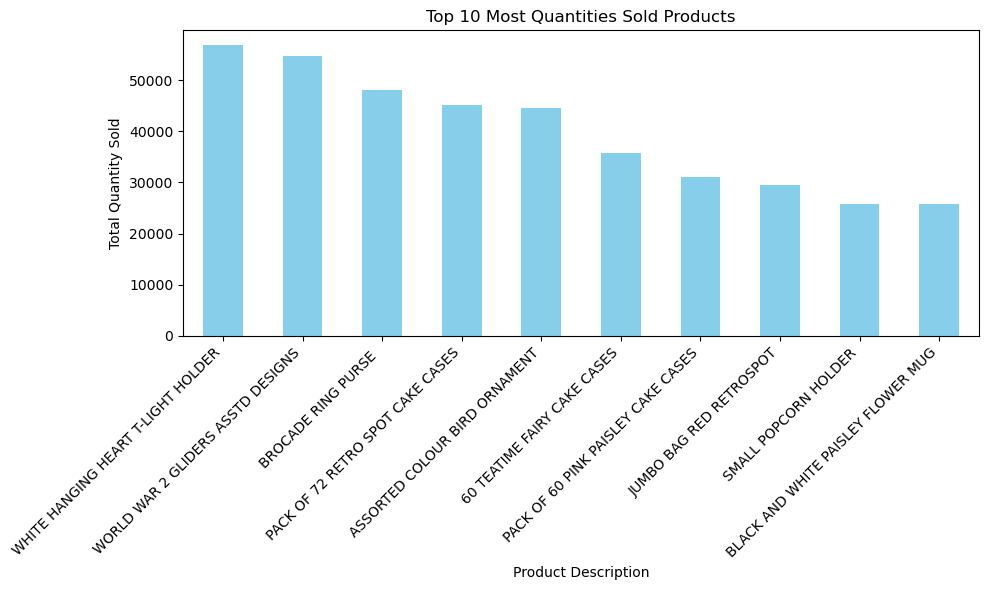

In [91]:
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Quantities Sold Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top10QtySoldProd.jpg')
plt.show()

In [105]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month,DayOfWeek,Year,Sales,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12,1,2009,83.4,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,1,2009,81.0,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,1,2009,81.0,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12,1,2009,100.8,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12,1,2009,30.0,7
